In [1]:
import os, sys
sys.path.append('../../')
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from adjustText import adjust_text
from utils.evaluate import get_dpc_clusters
from utils.evaluate import get_dpc_unassigned
from utils.evaluate import get_jsdiv
basemap = cx.providers.CartoDB.VoyagerNoLabels

In [2]:
pth = os.path.join('..', '..', 'data', 'density_modeling', 'training_us.gpkg')
gdf_us = gpd.read_file(pth); gdf_us

,city,state,country,latitude,longitude,population,msa,fold,cluster,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,1,new york city new york united states,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,2,cleveland ohio united states,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,1,None,POINT (-9001026.859 4814418.565)
3,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,1,medford oregon united states,POINT (-13688622.711 5208050.499)
4,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,1,asheville north carolina united states,POINT (-9169213.911 4173187.121)
...,...,...,...,...,...,...,...,...,...,...
7151,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,2,dallas texas united states,POINT (-10813762.352 3837467.237)
7152,belfast,maine,united states,44.42591,-69.00642,6682,None,1,belfast maine united states,POINT (-7681759.536 5531591.056)
7153,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,1,detroit michigan united states,POINT (-9334258.415 5321578.2)
7154,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,2,atlanta georgia united states,POINT (-9369783.804 4003071.597)


In [3]:
# split clusters vs. unassigned
cluster_msk = ~gdf_us.cluster.isna()
gdf_us_clus = gdf_us.loc[cluster_msk].copy()
gdf_us_other = gdf_us.loc[~cluster_msk].copy()

In [4]:
gdf_us_clus

,city,state,country,latitude,longitude,population,msa,fold,cluster,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,1,new york city new york united states,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,2,cleveland ohio united states,POINT (-9092157.447 5070828.79)
3,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,1,medford oregon united states,POINT (-13688622.711 5208050.499)
4,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,1,asheville north carolina united states,POINT (-9169213.911 4173187.121)
5,olivette,missouri,united states,38.66533,-90.37595,7870,None,2,st louis missouri united states,POINT (-10060604.734 4673845.715)
...,...,...,...,...,...,...,...,...,...,...
7151,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,2,dallas texas united states,POINT (-10813762.352 3837467.237)
7152,belfast,maine,united states,44.42591,-69.00642,6682,None,1,belfast maine united states,POINT (-7681759.536 5531591.056)
7153,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,1,detroit michigan united states,POINT (-9334258.415 5321578.2)
7154,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,2,atlanta georgia united states,POINT (-9369783.804 4003071.597)


In [5]:
gdf_us_other

,city,state,country,latitude,longitude,population,msa,fold,cluster,geometry
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,1,None,POINT (-9001026.859 4814418.565)
10,selmer,tennessee,united states,35.17008,-88.59227,4488,None,1,None,POINT (-9862046.385 4187018.425)
14,haines,alaska,united states,59.23595,-135.44533,1713,None,2,None,POINT (-15077705.166 8231560.444)
20,new johnsonville,tennessee,united states,36.02117,-87.96698,1897,None,2,None,POINT (-9792439.42 4303534.723)
21,windber,pennsylvania,united states,40.23980,-78.83502,3974,None,1,None,POINT (-8775874.283 4900850.797)
...,...,...,...,...,...,...,...,...,...,...
7123,grayson,kentucky,united states,38.33258,-82.94850,4058,Atlanta-Sandy Springs-Marietta GA MSA,1,None,POINT (-9233784.782 4626515.335)
7125,plainview,texas,united states,34.18479,-101.70684,20919,None,1,None,POINT (-11321953.639 4053641.88)
7132,milledgeville,georgia,united states,33.08014,-83.23210,18931,None,2,None,POINT (-9265354.99 3905946.045)
7146,ada,oklahoma,united states,34.77453,-96.67834,17303,Grand Rapids-Wyoming MI MSA,1,None,POINT (-10762183.58 4133282.73)


In [6]:
# compute 'distance per capita' (~inverse density)
gdf_us_clus = get_dpc_clusters(gdf_us_clus, 'cluster')
gdf_us_other = get_dpc_unassigned(gdf_us_other, gdf_us_clus, 'cluster')

c:\Users\ccrea\Documents\revelio-assignment\notebooks\evaluation\../..\utils\evaluate.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centroids_map = (gdf.groupby(cluster_key).apply(lambda row: Point(
c:\Users\ccrea\Documents\revelio-assignment\notebooks\evaluation\../..\utils\evaluate.py:57: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centroids = gdf_ref.groupby(cluster_key).apply(lambda row: Point(


In [7]:
gdf_us_clus

,city,state,country,latitude,longitude,population,msa,fold,cluster,geometry,cluster_ref,dpc,log10_dpc
3390,harlem,new york,united states,40.80788,-73.94542,116345,Augusta-Richmond County GA-SC MSA,2,new york city new york united states,POINT (-8231566.501 4984045.174),new york city new york united states,0.000059,-4.227212
2063,east harlem,new york,united states,40.79472,-73.94250,115921,None,2,new york city new york united states,POINT (-8231241.448 4982109.9),new york city new york united states,0.000064,-4.196995
5009,astoria,new york,united states,40.77205,-73.93014,150165,New York-Northern New Jersey-Long Island NY-NJ...,1,new york city new york united states,POINT (-8229865.539 4978777.01),new york city new york united states,0.000088,-4.057589
3463,fordham,new york,united states,40.85927,-73.89847,94678,None,2,new york city new york united states,POINT (-8226340.051 4991606.129),new york city new york united states,0.000108,-3.965752
5929,manhattan,new york,united states,40.78343,-73.96625,1487536,Manhattan KS MSA,1,new york city new york united states,POINT (-8233885.286 4980449.928),new york city new york united states,0.000119,-3.925776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,la vernia,texas,united states,29.35635,-98.11556,1261,San Antonio TX MSA,2,elmendorf texas united states,POINT (-10922174.178 3421080.061),elmendorf texas united states,5.169669,0.713463
6317,bay minette,alabama,united states,30.88296,-87.77305,9118,None,1,bay minette alabama united states,POINT (-9770851.231 3617558.581),bay minette alabama united states,6.688467,0.825327
3908,tyndall afb,florida,united states,30.08560,-85.60750,2779,Panama City-Lynn Haven FL MSA,1,bay minette alabama united states,POINT (-9529783.308 3514557.678),bay minette alabama united states,10.562882,1.023782
535,tyndall air force base,florida,united states,30.08535,-85.60731,2994,None,2,bay minette alabama united states,POINT (-9529762.157 3514525.515),bay minette alabama united states,10.564860,1.023864


In [8]:
gdf_us_other

,city,state,country,latitude,longitude,population,msa,fold,cluster,geometry,cluster_ref,dpc,log10_dpc
462,east hampton,new york,united states,40.96343,-72.18480,1122,New York-Northern New Jersey-Long Island NY-NJ...,2,None,POINT (-8035575.179 5006949.093),new york city new york united states,0.003668,-2.435619
1153,montauk,new york,united states,41.03594,-71.95451,3326,New York-Northern New Jersey-Long Island NY-NJ...,2,None,POINT (-8009939.413 5017644.252),new york city new york united states,0.004166,-2.380270
1946,manteno,illinois,united states,41.25059,-87.83143,8999,Kankakee-Bradley IL MSA,1,None,POINT (-9777350.063 5049374.192),chicago illinois united states,0.008466,-2.072335
4793,waxahachie,texas,united states,32.38653,-96.84833,33384,Dallas-Fort Worth-Arlington TX MSA,1,None,POINT (-10781106.78 3814156.328),dallas texas united states,0.008528,-2.069144
4719,fountain hills,arizona,united states,33.61171,-111.71736,23899,Phoenix-Mesa-Scottsdale AZ MSA,2,None,POINT (-12436319.628 3976782.571),phoenix arizona united states,0.009927,-2.003178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,haines,alaska,united states,59.23595,-135.44533,1713,None,2,None,POINT (-15077705.166 8231560.444),eielson afb alaska united states,242.884260,2.385399
2412,skagway,alaska,united states,59.45833,-135.31389,920,None,2,None,POINT (-15063073.332 8280115.992),eielson afb alaska united states,243.403038,2.386326
799,gustavus,alaska,united states,58.41333,-135.73694,434,None,1,None,POINT (-15110167.043 8054651.12),eielson afb alaska united states,245.038157,2.389234
6195,sitka,alaska,united states,57.05315,-135.33088,8863,None,2,None,POINT (-15064964.65 7770989.839),eielson afb alaska united states,264.904768,2.423090


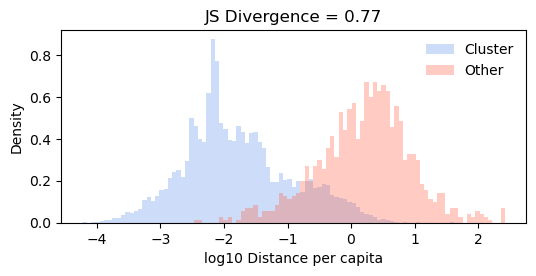

In [9]:
jsdiv, ax = get_jsdiv(gdf_us_clus,
                      gdf_us_other,
                      'log10_dpc',
                      n_bins = 100,
                      plot = True,
                      return_ax = True,
                      gdf1_label = 'Cluster',
                      gdf2_label = 'Other')

ax.legend(frameon = False)
ax.set_title(f'JS Divergence = {jsdiv.round(2)}')
ax.set_xlabel('log10 Distance per capita')
ax.set_ylabel('Density')
plt.show()

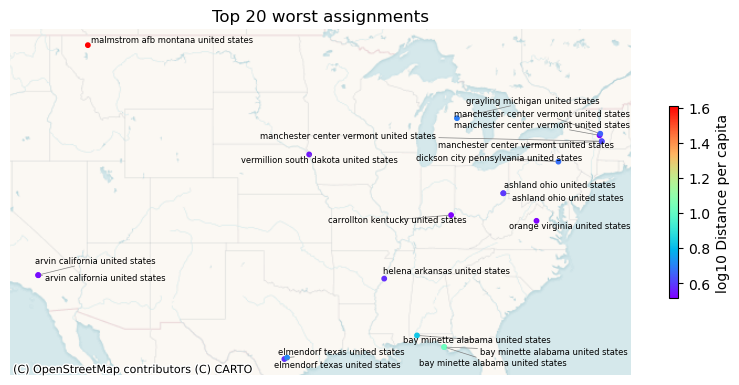

In [10]:
# worst cluster assignments by dpc
top_n, ms, fs = 20, 10., 6.
gdf_plt = gdf_us_clus.tail(top_n)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf_plt.plot(column = 'log10_dpc',
             cmap = 'rainbow',
             markersize = ms,
             legend = True,
             legend_kwds = {'label': 'log10 Distance per capita', 'shrink' : .25},
             ax = ax)
cx.add_basemap(ax, source = basemap)
labels = [ax.text(row.geometry.x, row.geometry.y, row.cluster, fontsize = fs)
          for _, row in gdf_plt.iterrows()]
adjust_text(labels, ax = ax, arrowprops = dict(arrowstyle = '-', color = 'gray', lw = .5))
ax.set_title(f'Top {top_n} worst assignments')
ax.axis(False)
plt.show()

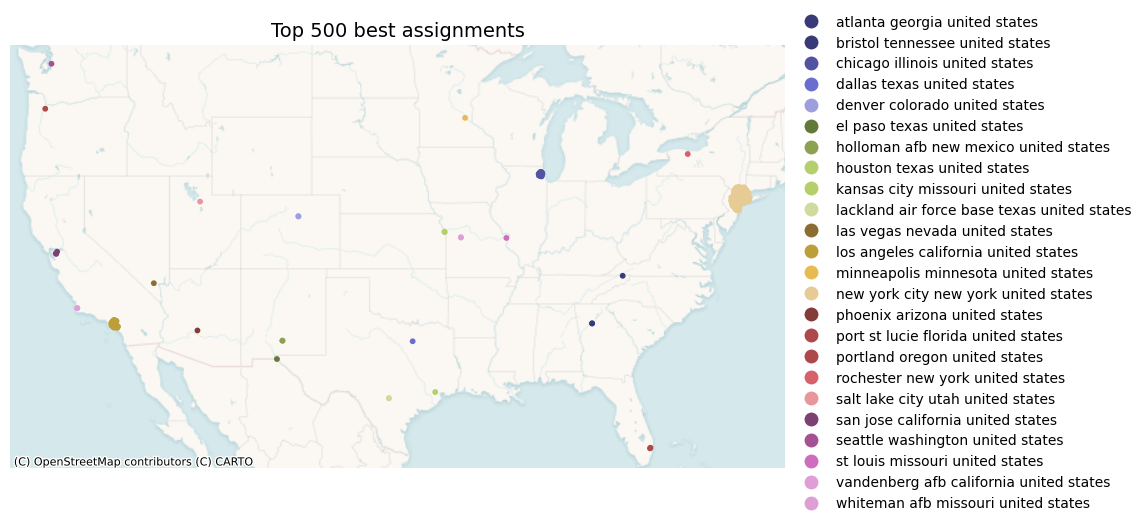

In [16]:
# best cluster assignments by dpc
top_n = 500
gdf_plt = gdf_us_clus.head(top_n)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf_plt.plot(column = 'cluster',
             cmap = 'tab20b',
             markersize = ms,
             legend = True,
             ax = ax)
cx.add_basemap(ax, source = basemap)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 1.1))
leg.set_frame_on(False)
ax.set_title(f'Top {top_n} best assignments', size = 14)
ax.axis(False)
plt.show()